In [4]:
import numpy as np
import pandas as pd


# modelling
from sklearn.model_selection import train_test_split


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/content/drive')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,roc_auc_score
import pickle
import shap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 12.6 MB/s 


In [25]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/telecom_users.csv')

In [ ]:
!pip install --pre pycaret

In [ ]:
!pip install interpret

In [26]:
df=df.drop(columns=['Unnamed: 0','customerID'])

In [27]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
df = df.loc[df.TotalCharges!=' ']

df.TotalCharges = pd.to_numeric(df.TotalCharges)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
df['Churn']=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [29]:
X = df.iloc[:,:-1]
y = df['Churn']


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   object 
 1   SeniorCitizen     5976 non-null   int64  
 2   Partner           5976 non-null   object 
 3   Dependents        5976 non-null   object 
 4   tenure            5976 non-null   int64  
 5   PhoneService      5976 non-null   object 
 6   MultipleLines     5976 non-null   object 
 7   InternetService   5976 non-null   object 
 8   OnlineSecurity    5976 non-null   object 
 9   OnlineBackup      5976 non-null   object 
 10  DeviceProtection  5976 non-null   object 
 11  TechSupport       5976 non-null   object 
 12  StreamingTV       5976 non-null   object 
 13  StreamingMovies   5976 non-null   object 
 14  Contract          5976 non-null   object 
 15  PaperlessBilling  5976 non-null   object 
 16  PaymentMethod     5976 non-null   object 


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
y_train.shape

(4780,)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


In [33]:
avinash_model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/data/lr_SMOTENC_avinash.sav', 'rb'))


In [34]:
prediction_df = avinash_model.predict(X_test)

In [35]:
prediction_df=[1 if c=='Yes' else 0 for c in prediction_df]

In [36]:

#predictions = prediction_df['prediction_label']
print(classification_report(y_test, prediction_df))

pd.DataFrame(confusion_matrix(y_test, prediction_df))


              precision    recall  f1-score   support

           0       0.88      0.77      0.82       878
           1       0.53      0.72      0.61       318

    accuracy                           0.76      1196
   macro avg       0.71      0.74      0.72      1196
weighted avg       0.79      0.76      0.77      1196



,0,1
0,678,200
1,90,228


In [ ]:
avinash_model.named_steps['model']

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
avinash_model

In [ ]:
class_labels = avinash_model.named_steps['model'].classes_
pd.DataFrame(confusion_matrix(y_test, prediction_df), 
             columns=class_labels, index=class_labels)

,No,Yes
No,678,200
Yes,90,228


In [40]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
num_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
avinash_model.named_steps['pre_process']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('knn_imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='Not '
                                                                           'Available',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                 

In [37]:

train_pipe = avinash_model[:-1].transform(X_train)
explainer = shap.TreeExplainer(avinash_model.named_steps["model"])
shap_values = explainer.shap_values(train_pipe)

InvalidModelError: ignored

In [41]:
feat=avinash_model.named_steps['pre_process'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features)
feat

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


array(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'Payment

In [42]:
all_feat=num_features

for f in feat:
  all_feat.append(f)
len(all_feat)

45

In [43]:
feature_importance=pd.DataFrame({
    'Feature': all_feat,
    'Coef': avinash_model['model'].coef_[0].tolist()
}).sort_values(by=['Coef'], ascending=False)
importance=feature_importance[(feature_importance['Coef'])>0.5]
importance.set_index('Feature')

,Coef
Feature,
MultipleLines_No phone service,1.343237
TotalCharges,1.215356
PhoneService_Yes,1.203355
InternetService_Fiber optic,0.883451
Contract_Month-to-month,0.745993
OnlineSecurity_No,0.619305


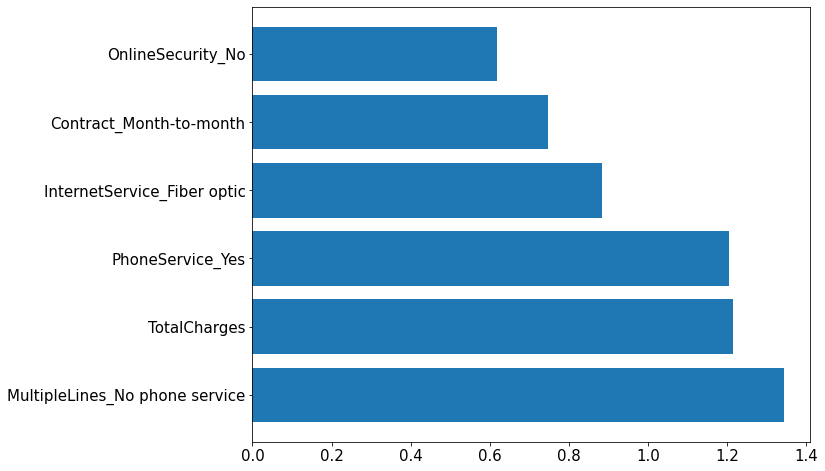

In [44]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(importance.Feature, importance.Coef,  align='center');


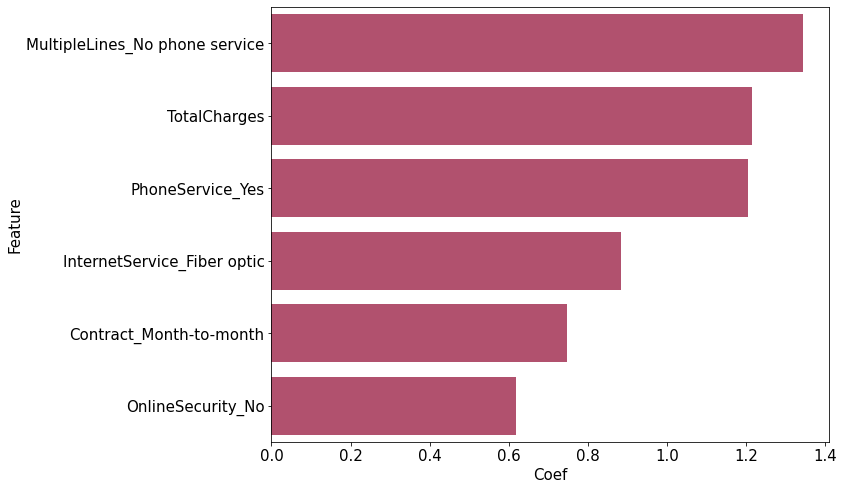

In [ ]:
colors = [1 if c >= 0 else 0 for c in importance.Coef]
plt.figure(figsize=(10,8))
sns.barplot(y = importance.Feature, x= importance.Coef, data = importance, orient='h',hue=colors, palette='flare' );
plt.legend([],[], frameon=False);

In [ ]:
avinash_model

In [ ]:
model=avinash_model.fit(X_train,y_train)
model

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

In [ ]:
avinash_model.named_steps['model'].predict

<bound method LinearClassifierMixin.predict of LogisticRegression(random_state=42, solver='liblinear')>

In [ ]:
X_train_p=avinash_model.named_steps['pre_process'].transform(X_train)

In [ ]:
X_train_p

array([[-0.40440819,  1.53105984, -1.65355841, ...,  0.        ,
         0.        ,  1.        ],
       [-0.40440819,  0.35603472, -0.07195667, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.47274915, -0.06361711,  1.0722552 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.40440819,  0.23013917, -1.65880708, ...,  0.        ,
         0.        ,  1.        ],
       [-0.40440819, -0.18951266,  0.67685477, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.47274915,  1.82481612,  0.12399398, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
dw2=pd.DataFrame(X_train_p,columns=all_feat)
dw2

In [49]:
def model_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=X_train.columns)
    return avinash_model.predict(data_asframe)

In [ ]:
type(model_predict)

function

In [50]:
shap_kernel_explainer = shap.KernelExplainer(model_predict, X_train)

TypeError: ignored

In [ ]:

shap_values_single = shap_kernel_explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(shap_kernel_explainer.expected_value[0],np.array(shap_values_single[0]), X_test.iloc[0,:])

NameError: ignored

In [ ]:
train_pipe = avinash_model[:-1].transform(X_test)

In [ ]:
X_train_p = avinash_model[:-1].transform(X_train)

In [ ]:
df1=pd.DataFrame(X_train_p)

In [ ]:
df1

In [ ]:
explainer = shap.KernelExplainer(avinash_model.predict, data=X_train)


Provided model function fails when applied to the provided data set.


ValueError: ignored